In [1]:
# import all Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import random

In [2]:
# Load the data
df = pd.read_csv('Life Expectancy Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
#printing numerical and categorical columns
num_col = df.select_dtypes(include=np.number).columns
print("Numerical Columns :\n", num_col)
cat_col = df.select_dtypes(exclude= np.number).columns
print("Categorical Columns :\n", cat_col)

Numerical Columns :
 Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical Columns :
 Index(['Country', 'Status'], dtype='object')


In [7]:
#removing extra spaces in columns
df = df.rename(columns=lambda x: x.strip())

In [8]:
#changing categorical columns to numerical
label_encoder = preprocessing.LabelEncoder()

df['Status'] = label_encoder.fit_transform(df['Status'])

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
#number of null values
print(df.isna().sum())
print(df.shape)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64
(2938, 22)


In [10]:
#treat na values using mean
for i in df.columns.drop('Country'):
    df[i].fillna(df[i].mean(), inplace = True)

## EDA :

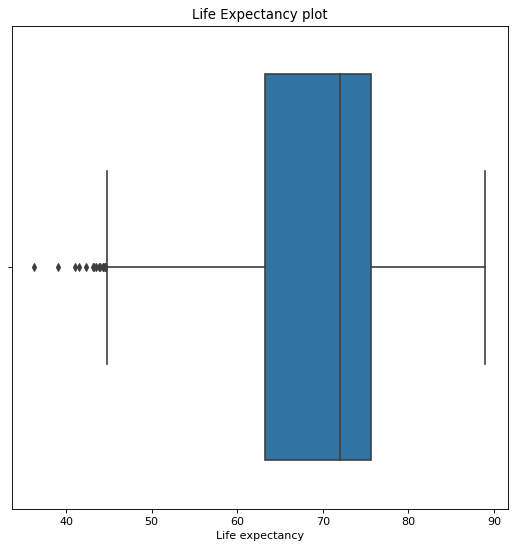

In [11]:
#distribution of Life Expectancy
plt.figure(figsize = (8,8) , dpi = 80)
sns.boxplot(df['Life expectancy'])
plt.title('Life Expectancy plot')
plt.show()

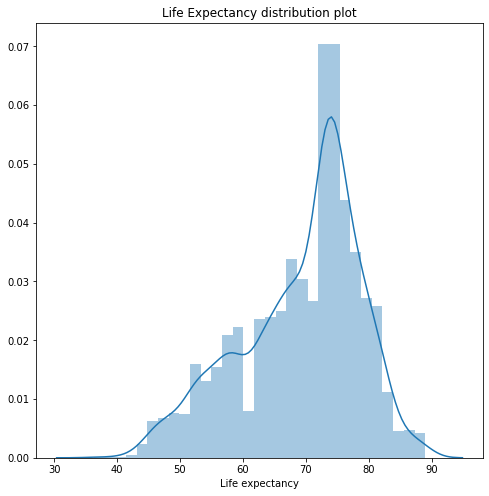

In [12]:
plt.figure(figsize = (8,8))
plt.title('Life Expectancy distribution plot')
sns.distplot(df['Life expectancy'])

##### Summary : The y variable has few outliers and is linearly distributed. Hence , Linear Regression holds good.

## Model Building :

In [13]:
#train test split
X = df.drop(columns=['Life expectancy' , 'Country'])
y = df[['Life expectancy']]

X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.3, random_state=1234)

In [14]:
# selecting 1 feature in regression model
X_train1 = X_train['Income composition of resources']

In [15]:
X_train1 = sm.add_constant(X_train1)

model_1 = sm.OLS(y_train, X_train1).fit()

In [16]:
model_1.params

const                              48.440947
Income composition of resources    33.059741
dtype: float64

In [17]:
#summary of model
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     1974.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):          1.09e-302
Time:                        15:36:47   Log-Likelihood:                -6894.3
No. Observations:                2056   AIC:                         1.379e+04
Df Residuals:                    2054   BIC:                         1.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [18]:
#adding another feature in the regression model
X_train2 = X_train[['Income composition of resources', 'Schooling']]

In [19]:
X_train2 = sm.add_constant(X_train2)

model_2 = sm.OLS(y_train, X_train2).fit()

In [20]:
model_2.params

const                              43.145928
Income composition of resources    16.273079
Schooling                           1.320315
dtype: float64

In [21]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     1316.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:36:47   Log-Likelihood:                -6738.3
No. Observations:                2056   AIC:                         1.348e+04
Df Residuals:                    2053   BIC:                         1.350e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [22]:
#adding 3rd feature in the regression model
X_train3 = X_train[['Income composition of resources', 'Schooling', 'Adult Mortality']]

In [23]:
X_train3 = sm.add_constant(X_train3)

model_3 = sm.OLS(y_train, X_train3).fit()

In [24]:
model_3.params

const                              56.227689
Income composition of resources    10.637516
Schooling                           1.003654
Adult Mortality                    -0.034790
dtype: float64

In [25]:
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1765.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:36:47   Log-Likelihood:                -6275.3
No. Observations:                2056   AIC:                         1.256e+04
Df Residuals:                    2052   BIC:                         1.258e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## Solving by RFE method and eleminating by p-value and VIF

In [26]:
lm = LinearRegression()
lm.fit(X_train , y_train)

# column count is 15

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train , y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Year', False, 2),
 ('Status', True, 1),
 ('Adult Mortality', True, 1),
 ('infant deaths', True, 1),
 ('Alcohol', True, 1),
 ('percentage expenditure', False, 3),
 ('Hepatitis B', True, 1),
 ('Measles', False, 5),
 ('BMI', True, 1),
 ('under-five deaths', True, 1),
 ('Polio', True, 1),
 ('Total expenditure', True, 1),
 ('Diphtheria', True, 1),
 ('HIV/AIDS', True, 1),
 ('GDP', False, 4),
 ('Population', False, 6),
 ('thinness  1-19 years', True, 1),
 ('thinness 5-9 years', True, 1),
 ('Income composition of resources', True, 1),
 ('Schooling', True, 1)]

In [28]:
imp_columns = X_train.columns[rfe.support_]
imp_columns

Index(['Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B',
       'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [29]:
X_train_rfe = X_train[imp_columns]

#### Until we get acceptable range of P-value and VIF , we keep dropping variables one at a time

#### High p-value high VIF : Drop the variable
#### High p-value low VIF : Drop the variable with high p-value first
#### Low p-value low VIF : Accept the variable

## Checking VIF

In [30]:
random.seed(0)

#add constant
X_train_rfec = sm.add_constant(X_train_rfe)

#build the model
lm_rfe = sm.OLS(y_train, X_train_rfec).fit()

print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     620.1
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:36:47   Log-Likelihood:                -5823.0
No. Observations:                2056   AIC:                         1.168e+04
Df Residuals:                    2040   BIC:                         1.177e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [31]:
# check VIF of all features 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= "VIF", ascending = False)
vif

,Features,VIF
6,under-five deaths,178.16
2,infant deaths,177.70
14,Schooling,44.59
13,Income composition of resources,30.42
9,Diphtheria,30.31
7,Polio,26.28
11,thinness 1-19 years,19.47
12,thinness 5-9 years,19.31
4,Hepatitis B,19.00
5,BMI,8.28


In [32]:
# drop the variables as p-value is very high

X_train_rfe1 = X_train_rfe.drop(['thinness 5-9 years'], 1,)

#add constant and build 2nd model
X_train_rfe1c = sm.add_constant(X_train_rfe1)

#build the model
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     664.7
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:36:47   Log-Likelihood:                -5823.0
No. Observations:                2056   AIC:                         1.168e+04
Df Residuals:                    2041   BIC:                         1.176e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [33]:
# check VIF again sice p-value of alcohol is high
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range (X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= "VIF", ascending = False)
vif

,Features,VIF
6,under-five deaths,177.82
2,infant deaths,177.16
13,Schooling,44.55
12,Income composition of resources,30.42
9,Diphtheria,30.30
7,Polio,26.28
4,Hepatitis B,18.99
5,BMI,8.19
8,Total expenditure,7.74
0,Status,7.10


### since VIF value of alohol is not very hight , we prioritize under-five deaths feature and remove it

In [34]:
X_train_rfe2 = X_train_rfe1.drop(['under-five deaths'], 1,)

#add constant and build 2nd model
X_train_rfe2c = sm.add_constant(X_train_rfe2)

#build the model
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     675.4
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:36:47   Log-Likelihood:                -5872.2
No. Observations:                2056   AIC:                         1.177e+04
Df Residuals:                    2042   BIC:                         1.185e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Again here, Alcohol is having hight p_value.so, compute VIF again and remove the feature Alcohol.

In [35]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range (X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= "VIF", ascending = False)
vif

,Features,VIF
12,Schooling,44.53
11,Income composition of resources,30.29
8,Diphtheria,29.80
6,Polio,26.22
4,Hepatitis B,18.76
5,BMI,8.19
7,Total expenditure,7.73
0,Status,7.06
1,Adult Mortality,4.38
3,Alcohol,4.23


In [36]:
X_train_rfe3 = X_train_rfe2.drop(['Alcohol'], 1,)

#add constant and build 2nd model
X_train_rfe3c = sm.add_constant(X_train_rfe3)

#build the model
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     732.0
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:36:47   Log-Likelihood:                -5872.2
No. Observations:                2056   AIC:                         1.177e+04
Df Residuals:                    2043   BIC:                         1.184e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [37]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range (X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= "VIF", ascending = False)
vif

,Features,VIF
11,Schooling,42.11
10,Income composition of resources,30.28
7,Diphtheria,29.80
5,Polio,26.16
3,Hepatitis B,18.73
4,BMI,8.18
6,Total expenditure,7.49
0,Status,6.05
1,Adult Mortality,4.30
9,thinness 1-19 years,3.96


In [38]:
X_train_rfe4 = X_train_rfe3.drop(['Schooling'], 1,)

#add constant and build 2nd model
X_train_rfe4c = sm.add_constant(X_train_rfe4)

#build the model
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     716.7
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:36:47   Log-Likelihood:                -5961.9
No. Observations:                2056   AIC:                         1.195e+04
Df Residuals:                    2044   BIC:                         1.202e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [39]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range (X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= "VIF", ascending = False)
vif

,Features,VIF
7,Diphtheria,29.69
5,Polio,25.80
3,Hepatitis B,18.59
10,Income composition of resources,13.90
4,BMI,7.83
6,Total expenditure,7.22
0,Status,6.05
1,Adult Mortality,4.30
9,thinness 1-19 years,3.95
8,HIV/AIDS,1.69


In [40]:
X_train_rfe5 = X_train_rfe4.drop(['Diphtheria'], 1,)

#add constant and build 2nd model
X_train_rfe5c = sm.add_constant(X_train_rfe5)

#build the model
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     748.8
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:36:47   Log-Likelihood:                -6004.1
No. Observations:                2056   AIC:                         1.203e+04
Df Residuals:                    2045   BIC:                         1.209e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range (X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= "VIF", ascending = False)
vif

,Features,VIF
5,Polio,17.90
3,Hepatitis B,16.46
9,Income composition of resources,13.42
4,BMI,7.82
6,Total expenditure,7.12
0,Status,6.04
1,Adult Mortality,4.29
8,thinness 1-19 years,3.95
7,HIV/AIDS,1.69
2,infant deaths,1.45


In [42]:
X_train_rfe6 = X_train_rfe5.drop(['Hepatitis B'], 1,)

#add constant and build 2nd model
X_train_rfe6c = sm.add_constant(X_train_rfe6)

#build the model
lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

print(lm_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     830.3
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:36:48   Log-Likelihood:                -6006.1
No. Observations:                2056   AIC:                         1.203e+04
Df Residuals:                    2046   BIC:                         1.209e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range (X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= "VIF", ascending = False)
vif

,Features,VIF
4,Polio,13.98
8,Income composition of resources,12.91
3,BMI,7.75
5,Total expenditure,6.99
0,Status,5.81
1,Adult Mortality,4.26
7,thinness 1-19 years,3.87
6,HIV/AIDS,1.68
2,infant deaths,1.43


In [44]:
X_train_rfe7 = X_train_rfe6.drop(['Polio'], 1,)

#add constant and build 2nd model
X_train_rfe7c = sm.add_constant(X_train_rfe7)

#build the model
lm_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     842.4
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:36:48   Log-Likelihood:                -6089.0
No. Observations:                2056   AIC:                         1.220e+04
Df Residuals:                    2047   BIC:                         1.225e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range (X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= "VIF", ascending = False)
vif

,Features,VIF
7,Income composition of resources,9.62
3,BMI,7.49
4,Total expenditure,6.53
0,Status,5.56
1,Adult Mortality,4.25
6,thinness 1-19 years,3.75
5,HIV/AIDS,1.68
2,infant deaths,1.41


### The acceptable range of VIF depends on criticality of the model. Here, let's say that VIF should be less than 10. And R-squared and Adj. R-squared values are also quite good. Hence , we can say that this model is good for productionization. 